In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
balance_data = pd.read_csv('/content/heart.csv')
balance_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn import tree
import graphviz

In [ ]:
X = balance_data[['cp','trestbps','ca']]
Y = balance_data.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100)


In [ ]:
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [ ]:
clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth = 3, min_samples_leaf = 5)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5,
                       random_state=100)

In [ ]:
def prediction(X_test, clf_object):
  y_pred = clf_object.predict(X_test)
  print("Predicted values:")
  print(y_pred)
  return y_pred

In [ ]:
def cal_accuracy(y_test, y_pred):
  print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

In [ ]:
print("Results Using Gini Index:")
y_pred_gini = prediction(X_test, clf_gini)
cal_accuracy(y_test, y_pred_gini)

Results Using Gini Index:
Predicted values:
[1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0
 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 1]
Accuracy :  75.97402597402598


In [ ]:
print("Results Using Entropy:")
y_pred_entropy = prediction(X_test, clf_entropy)
cal_accuracy(y_test, y_pred_entropy)

Results Using Entropy:
Predicted values:
[1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 1
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0
 0 0 0 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0
 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 1
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 0
 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 0 1
 0 1 0 1 0 0 0 1 0 1 1 1]
Accuracy :  75.97402597402598


In [ ]:
def printTree(classifier):
    feature_names = ['Chest Pain', 'Blood Circulation', 'Blocked Arteries']
    target_names = ['HD-Yes', 'HD-No']
    dot_data = tree.export_graphviz(classifier,out_file=None,feature_names=feature_names,class_names=target_names, filled = True)
    tr = graphviz.Source(dot_data, format ="png")
    return tr

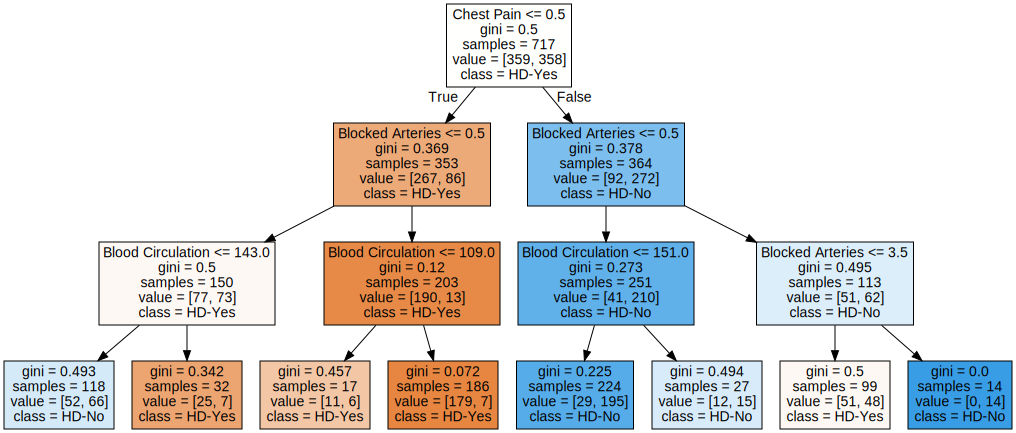

In [ ]:
tr_gini = printTree(clf_gini)
tr_gini

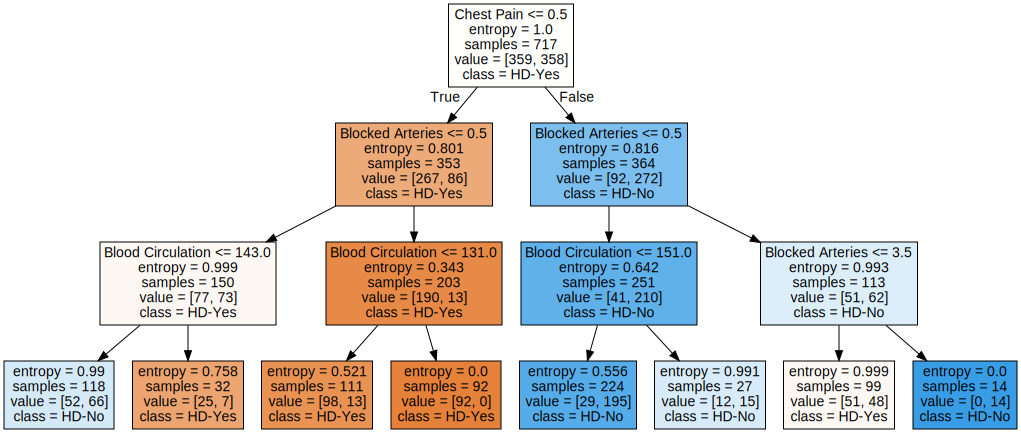

In [ ]:
tr_entropy = printTree(clf_entropy)
tr_entropy
